In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import math
import datetime
from Tools import *

In [3]:
def format_time(dfTime):
    x=[]
    for i in dfTime:
        i=str(i)
        new_i=""
        count=1
        for j in i:
            if count%2==0 and count!=len(i):
                new_i+=j
                new_i+=":"
            else:
                new_i+=j
            count+=1
        x.append(new_i)
    xy=pd.Series(x)
    return xy

In [4]:
def add_minute(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    
    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    befor6M=c+relativedelta(minutes=-6)
    return after6M,befor6M


In [5]:
def add_minute2(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    minutes=[]

    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    #befor6M=c+relativedelta(minutes=-6)
    #minutes.append([after6M,befor6M,i])
    return after6M

### Fiyatlar okunuyor. Geçici "df" e yazılıyor.

In [6]:
df=pd.read_csv("tsla.us.txt",sep=",",names=['TICKER','PER','DATE','TIME','OPEN','HIGH','LOW','CLOSE','VOL','OPENINT'])

Gereksiz kolonlar siliniyor. Date kolonu formatlanıyor

In [7]:
df=df.drop(["PER","TICKER"],axis='columns')
df["DATE2"]=pd.to_datetime(df["DATE"],format="%Y%m%d")
df["DATE2"]=df["DATE2"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y"))
df["TIME2"]=format_time(df["TIME"])
#df["ID"]=[i for i in range(0,len(df))]
df.insert(0,"ID",range(0,len(df)))

In [8]:
df.tail()

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00
2729,2729,20201019,215500,432.60,432.85,430.410,430.830,1028440,0,19/10/2020,21:55:00


Günlük fiyat değişimleri hesaplanıyor

In [9]:
df["DIFF"]=df["CLOSE"]-df["OPEN"]
df.loc[df['DIFF'] < 0, 'STATUS'] = -1
df.loc[df['DIFF'] > 0, 'STATUS'] = 1
df.loc[df['DIFF'] == 0, 'STATUS'] = 0 ## TO-DO: Bir tolerans aralığındaki değerleri 0 olarak işaretlenmesi yapıladak.
df["DIFF_PERC"]=(df["DIFF"]*100)/df["OPEN"]
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096


Zaman kolunu formatlanıyor. DATETIME kolonu oluşturuluyor

In [10]:
df["DATETIME"]=df["DATE2"]+" "+df["TIME2"]
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df["DATETIME"]=df["DATETIME"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y %H:%M:%S"))
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC,DATETIME
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072,2020-08-31 15:30:00
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625,2020-08-31 15:35:00
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642,2020-08-31 15:40:00
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929,2020-08-31 15:45:00
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578,2020-08-31 15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309,2020-10-19 21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299,2020-10-19 21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389,2020-10-19 21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096,2020-10-19 21:50:00


<font color=aqua >Fiyatlar son haliyle "df_s" e yazılıyor. <b>Header ekleniyor</b></font>

In [11]:
df_s=df.loc[:,["ID","OPEN","HIGH","LOW","CLOSE","STATUS","DIFF_PERC","DATETIME"]]

#### 0 a yakın değerler bulunup tolerans tespit ediliyor.

[  2.   1.   0.   1.   1.   1.   2.   6.  15.  12.  33.  59. 150. 453.
 922. 635. 250.  92.  50.  14.   8.   7.   9.   3.   1.   0.   1.   1.
   0.   1.]
[-4.34388049 -4.04847583 -3.75307118 -3.45766652 -3.16226186 -2.8668572
 -2.57145255 -2.27604789 -1.98064323 -1.68523857 -1.38983392 -1.09442926
 -0.7990246  -0.50361995 -0.20821529  0.08718937  0.38259403  0.67799868
  0.97340334  1.268808    1.56421266  1.85961731  2.15502197  2.45042663
  2.74583128  3.04123594  3.3366406   3.63204526  3.92744991  4.22285457
  4.51825923]
<a list of 30 Patch objects>


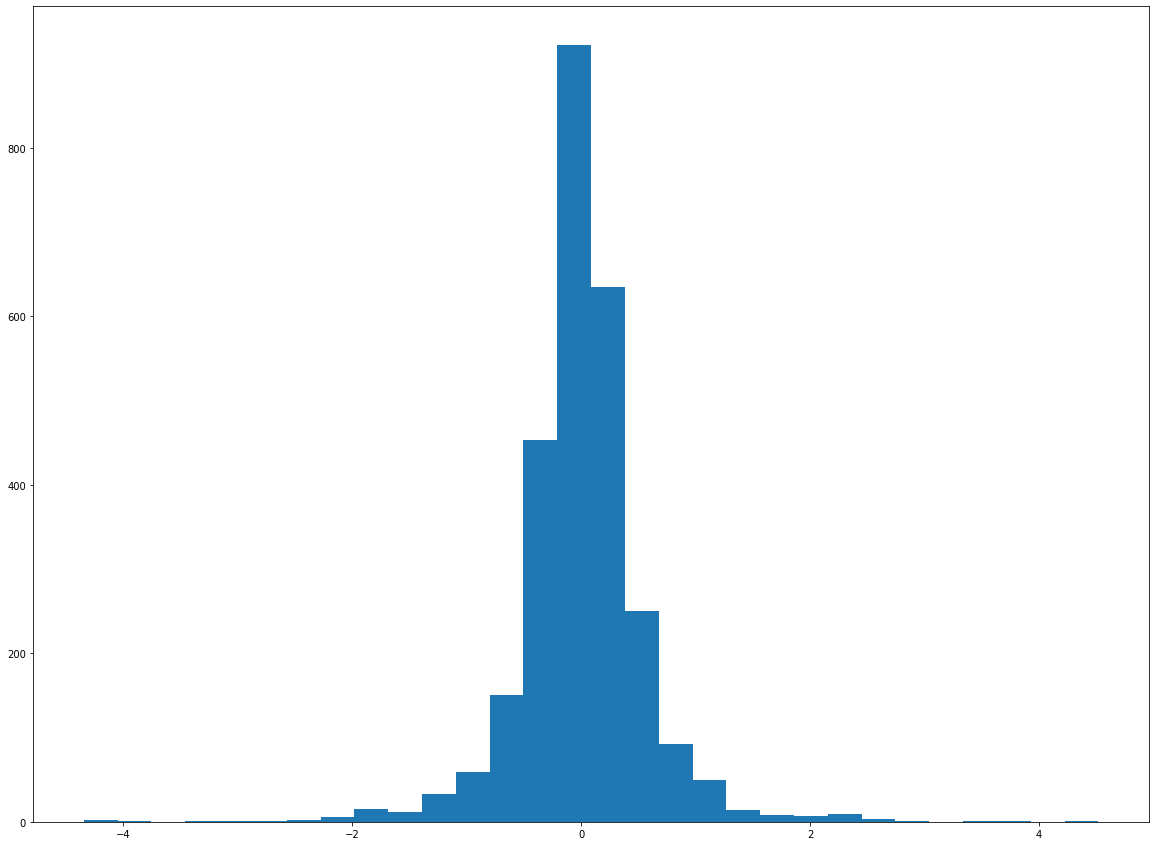

In [12]:
import matplotlib.pyplot as plt
#df_s["DIFF_PERC"].hist(bins=50)
plt.figure(figsize=(20,15))
counts, bins, bars = plt.hist(df_s["DIFF_PERC"],bins=30)
print(counts)
print(bins)
print(bars)
## -0.20821529  0.08718937 bu aralığı "0" sayacağız

### Fiyatların olduğu zaman aralığındaki haberler alınıyor.


In [13]:

print(df_s.head())

print("Index Name: ",df_s.index.name)
start_date="2020-08-31 15:30:00"
end_date="2020-08-31 15:50:00"
mask = (df_s['DATETIME'] > start_date) & (df_s['DATETIME'] <= end_date)
df_s.loc[mask]
print(df_s.head())
print(df_s.columns)
print(df_s.shape)

   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index Name:  None
   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index(['ID', 'OPEN', 'HIGH', 'LOW', 'CLOSE', '

In [14]:
print(df_s)
#Aşağıdaki commentli değerler kullanılacak
#margin_neg=-0.20821529
#margin_pos=0.08718937

margin_neg=-0.00821529
margin_pos=0.00718937

mask2 = (df_s['DIFF_PERC'] > margin_neg) & (df_s['DIFF_PERC'] <= margin_pos)
df_s.loc[mask2,"DIFF_PERC"]=0
df_s.loc[mask2,"STATUS"]=0
df_s["DIFF_PERC"].value_counts(sort=True)



        ID    OPEN    HIGH      LOW    CLOSE  STATUS  DIFF_PERC  \
0        0  444.61  450.49  440.110  447.029     1.0   0.544072   
1        1  447.04  447.80  441.210  442.160    -1.0  -1.091625   
2        2  442.08  452.28  440.710  452.149     1.0   2.277642   
3        3  451.84  459.53  450.050  459.408     1.0   1.674929   
4        4  459.20  461.00  455.500  456.410    -1.0  -0.607578   
...    ...     ...     ...      ...      ...     ...        ...   
2725  2725  431.83  433.04  431.700  432.885     1.0   0.244309   
2726  2726  432.86  432.90  431.610  431.980    -1.0  -0.203299   
2727  2727  432.00  433.95  431.955  433.950     1.0   0.451389   
2728  2728  433.95  434.12  432.240  432.600    -1.0  -0.311096   
2729  2729  432.60  432.85  430.410  430.830    -1.0  -0.409154   

                DATETIME  
0    2020-08-31 15:30:00  
1    2020-08-31 15:35:00  
2    2020-08-31 15:40:00  
3    2020-08-31 15:45:00  
4    2020-08-31 15:50:00  
...                  ...  
2725 2

 0.000000    50
-0.041436     1
-0.468416     1
-0.169503     1
 0.741910     1
             ..
 0.050261     1
 0.378900     1
 0.045746     1
 0.107498     1
-0.016662     1
Name: DIFF_PERC, Length: 2681, dtype: int64

### Tarih aralığındaki fiyatları getiren fonksiyon

In [15]:
def get_prices(start_date,end_date,df):
    mask = (df['DATETIME'] > start_date) & (df['DATETIME'] <= end_date)
    df_x=df.loc[mask]
    return df_x

## Haberler çekiliyor.

In [16]:
df_news=pd.read_csv("TeslaNews.csv")
#Gereksiz kolonlar silindi
df_news.drop(df_news.columns[df_news.columns.str.contains("Unnamed",case=False)],axis=1,inplace=True)
#Date kolonu formatlanıyor
df_news['DATETIME'] = pd.to_datetime(df_news['Dates'])
#df_news['NewDates'] = df_news['NewDates'].dt.tz_localize('US/Eastern').dt.tz_convert('UTC')
df_news['DATETIME'] = df_news['DATETIME'].apply(lambda x: datetime.datetime.replace(x, tzinfo=None))
#Tekrarlı veriler hesaplanıp temizleniyor
df_temp=df_news[df_news.duplicated(keep=False)]
print("Tüm kolonlar tekrarlı veri sayısı: ",df_temp.shape)
df_temp=df_news[df_news.duplicated(subset=["Text"],keep=False)]
print("Text kolonu  tekrarlı veri sayısı: ",df_temp.shape)
df_temp=df_temp.drop(["Link"],axis=1)
#Bunu kontrol et silinmesi gerekebilir:
df_news[df_news.duplicated(subset=["DATETIME"],keep=False)]
df_news=df_news.sort_values("DATETIME",ascending=True)
df_news.insert(0,"ID",range(0,len(df_news)))
#+- 6 dk eklendi.
for i in range(0,len(df)):
    after=add_minute(df["DATETIME"][i])[0]
    df.loc[i,"AFTER"]=after
    before=add_minute(df["DATETIME"][i])[1]
    df.loc[i,"BEFORE"]=before

df_news=df_news.sort_values("DATETIME",ascending=True)

start_date="2020-08-31 15:30:00"
end_date="2020-10-19 21:55:00"
mask = (df_news['DATETIME'] > start_date) & (df_news['DATETIME'] <= end_date)
df_news2=df_news.loc[mask]


df_news2=df_news2.drop(["ID"],axis='columns')
df_news2.insert(0,"ID",range(0,len(df_news2)))
df_news2=df_news2.set_index("ID")
#df_news2.reset_index()

#df_news2.reindex(index=df_news2.index[::-1])



C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Tüm kolonlar tekrarlı veri sayısı:  (10, 4)
Text kolonu  tekrarlı veri sayısı:  (100, 4)


In [17]:
df_news2[df_news2["diff"].notnull()]
df_news2

KeyError: 'diff'

In [ ]:
count=0
df_x=pd.DataFrame()
df_news2["diff"]=np.nan
df_news2["change_rate"]=np.nan
for i in range(0,len(df_news2)):

    if i==len(df_news2)-1:
        start_date=df_news2["DATETIME"][i]
        end_date=start_date
    else:

        start_date=df_news2["DATETIME"][i]
        end_date=df_news2["DATETIME"][i+1]
    #print(get_prices(end_date,start_date,df_news2))
    
    df_temp=pd.DataFrame(get_prices(start_date,end_date,df_s))
    if not df_temp.empty:
        df_temp=df_temp.iloc[[0,-1]]
        df1=df_temp.iloc[0,4]
        df2=df_temp.iloc[1,4]
        df_diff=df2-df1
        df_change_rate=df_diff/df1
        print("Haber: ",df_news["Text"][i])
        print(df_diff)
        print(df_change_rate)
        df_news2["diff"][i]=df_diff
        df_news2["change_rate"][i]=df_change_rate
        df_x.append(df_temp,ignore_index=True)
        
    
    count+=1
    stri="Start Date: "+str(start_date)+"\t"+"End Date: "+str(end_date)

    del df_temp

In [ ]:
df_x

In [ ]:
a=10
for i in range(0,a):
    if i==a-1:
        print(i)


In [ ]:
df_n=pd.read_csv("TeslaNews.csv")

In [ ]:
df_n.head()

In [ ]:
df_n.tail()

- [ ] iso format--> ytc--edt dönüşümleri incelenecek
- [x] api entegre edildi
```python
    print("hello")
```

<span style="font-family:Consolas">Text</span>

<div class="alert alert-block alert-info">
<b>Yapılacaklar:</b></br> 
1) iso format--> ytc--edt dönüşümleri incelenecek</br>
2) Belli zaman aralığındaki veriler çekilecek
</div>

<div class="alert alert-block alert-success">
<b>Tamamlanan:</b> api entegre edildi.
</div>

<div class="alert alert-block alert-danger">
<b>Hata:</b> Hata yok.
</div>

<div class="alert alert-block alert-warning">
<b>Dikkat edilecekler:</b> ----
</div>

In [70]:
import requests
from datetime import date, timedelta
params = {
  'access_key': 'a7d3fe82fc47113f6c6da407a7d35041'
}
acc_key='a7d3fe82fc47113f6c6da407a7d35041'

api_res=[]
df_api=pd.DataFrame()
start_date = datetime.datetime(2020, 1, 1,0, 0, 1)
#start_date=start_date.isoformat()
#end_date = date(2020, 11, 1)
delta = timedelta(days=1)

#start_date="2020-01-01"
end_date=start_date+delta

print(start_date)
print(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=30min&date_from="+str(start_date)+"&date_to="+str(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key="+acc_key+"&symbols=TSLA&interval=1h&date_from=2020-11-01&date_to=2020-11-02"

s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from=2020-11-01&date_to=2020-11-03"
api_result = requests.get(s, params)
api_response = api_result.json()
print(api_response)
for stock_data in api_response['data']:
    print(stock_data['symbol'])
    print(stock_data['high'])
    print(stock_data['date'])



2020-01-01 00:00:01
2020-01-02 00:00:01
{'pagination': {'limit': 100, 'offset': 0, 'count': 22, 'total': 22}, 'data': [{'open': 392.73, 'high': 406.76, 'low': 390.66, 'last': 397.615, 'close': 388.04, 'volume': 253321.0, 'date': '2020-11-02T20:45:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 392.73, 'high': 406.76, 'low': 390.66, 'last': 399.825, 'close': 388.04, 'volume': 243475.0, 'date': '2020-11-02T20:30:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 392.73, 'high': 406.76, 'low': 390.66, 'last': 399.83, 'close': 388.04, 'volume': 232698.0, 'date': '2020-11-02T20:15:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 392.73, 'high': 406.76, 'low': 390.66, 'last': 397.4, 'close': 388.04, 'volume': 229208.0, 'date': '2020-11-02T20:00:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 392.73, 'high': 406.76, 'low': 390.66, 'last': 398.18, 'close': 388.04, 'volume': 223036.0, 'date': '2020-11-02T19:45:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, 

In [49]:
x = datetime.datetime(2020, 1, 1,0, 0, 1,)
x=x.isoformat()
x

'2020-01-01T00:00:01'